# Iteration 0 - Analyzation of Data 


Data set contain sales of various (~1000) protective gear products from 2019 to mid-September of 2023

Our challenge is to match the most important external factors (e.g. Economic Factors (e.g. Inflation)) to see and use relation between external factors and sales for future prediction, thanks to connecting external factors with our data we can see influence of external variables on our sales and predict future behavior.

Our task it to create model which is going to be able to predict future sales based on inputted data and selected features  

*Due to anonymization of data let's name our company "XYZ" for easier descriptions*

### Read data 

Here we are going to read data from file for analyzation

In [142]:
import pandas as pd
import seaborn as sns

# Read the CSV file
data = pd.read_csv('../Datasets/Sales Data/Sales Data 2019-2023.csv')

# Display the first few rows of the data
print(data.head())

      Index                                               Name  \
0   ZB5K005                    MAINZ safety glasses, clear uni   
1   ZB5K003             ALB protective goggles transparent uni   
2   ZB5K186                        ALF baseball cap, black uni   
3   ZB5K152   DALKE half mask with FFP2 valve light gray un...   
4   ZB5K007                    MAINZ tinted uni safety glasses   

  Z_Classification                Subgroup_2             Subgroup_3  \
0                A   EYE AND FACE PROTECTION                GLASSES   
1                B   EYE AND FACE PROTECTION                GLASSES   
2                B           BODY PROTECTION   CLOTHING ACCESSORIES   
3                B    RESPIRATORY PROTECTION             HALF MASKS   
4                B   EYE AND FACE PROTECTION                GLASSES   

                  Subgroup_4  2019-01  2019-02  2019-03  2019-04  ...  \
0   MAINZ PROTECTIVE GLASSES        0        0        0        0  ...   
1         ALB SAFETY GOGGLES  

Put data in data frame

In [143]:
df = pd.DataFrame(data)
df

,Index,Name,Z_Classification,Subgroup_2,Subgroup_3,Subgroup_4,2019-01,2019-02,2019-03,2019-04,...,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,total amount
0,ZB5K005,"MAINZ safety glasses, clear uni",A,EYE AND FACE PROTECTION,GLASSES,MAINZ PROTECTIVE GLASSES,0,0,0,0,...,1764,931,2813,2404,2978,10925,632,340,75,48532
1,ZB5K003,ALB protective goggles transparent uni,B,EYE AND FACE PROTECTION,GLASSES,ALB SAFETY GOGGLES,122,140,810,274,...,250,566,744,504,641,1393,572,672,75,30408
2,ZB5K186,"ALF baseball cap, black uni",B,BODY PROTECTION,CLOTHING ACCESSORIES,HAT,0,0,0,0,...,149,303,927,1298,2143,1047,1112,549,92,29872
3,ZB5K152,DALKE half mask with FFP2 valve light gray un...,B,RESPIRATORY PROTECTION,HALF MASKS,NaN,315,350,879,287,...,27,177,421,61,477,608,591,254,164,28601
4,ZB5K007,MAINZ tinted uni safety glasses,B,EYE AND FACE PROTECTION,GLASSES,MAINZ PROTECTIVE GLASSES,0,0,0,0,...,70,172,1542,757,1396,6058,572,291,63,22620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,ZB5K355-1-3XL,EMS protective trousers jeans blue 3XL (58),A,BODY PROTECTION,PROTECTIVE CLOTHING,PROTECTIVE TROUSERS,0,0,0,0,...,0,0,0,0,2,0,0,0,0,2
1027,ZB5K474-M,ELZ yellow winter hat uni MARKETY,NaN,BODY PROTECTION,CLOTHING ACCESSORIES,HAT,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1028,ZB5K516-48,ZORGE safety shoes S3 SRC black 48,N,LEG PROTECTION,SAFE SHOES,SHOES,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1029,ZB5K516-47,ZORGE safety shoes S3 SRC black 47,N,LEG PROTECTION,SAFE SHOES,SHOES,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


We create another data frame without last row to create histogram

We delete last row because it continues sums of columns and it if we would leave it histogram would show different not reliable data 

array([[<Axes: title={'center': 'total amount'}>]], dtype=object)

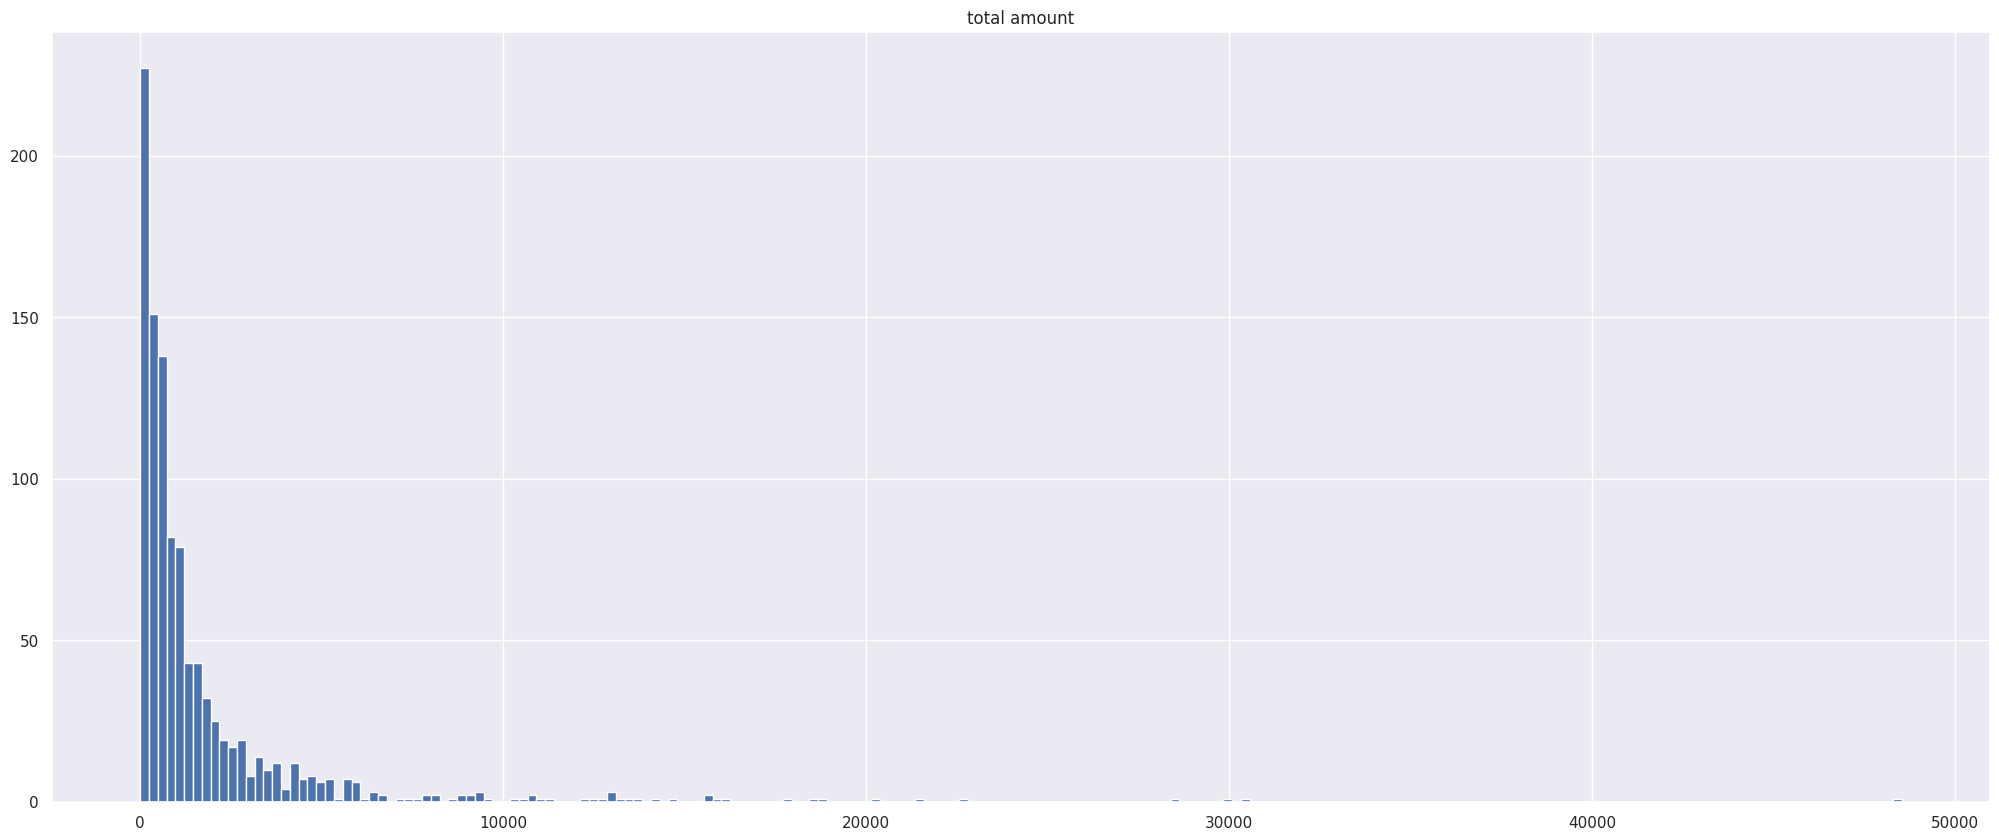

In [144]:
df2 = df.head(df.shape[0] - 1)

df2.hist(column="total amount", bins=200, figsize=(25,10),density=0)

# We used "bins=200" becouse of big amount of products, we need more detailed histogram to show correct trend

We can see on histogram that most products sold less than 1000 pieces per product 

Let's now generate plot to see trend in sales

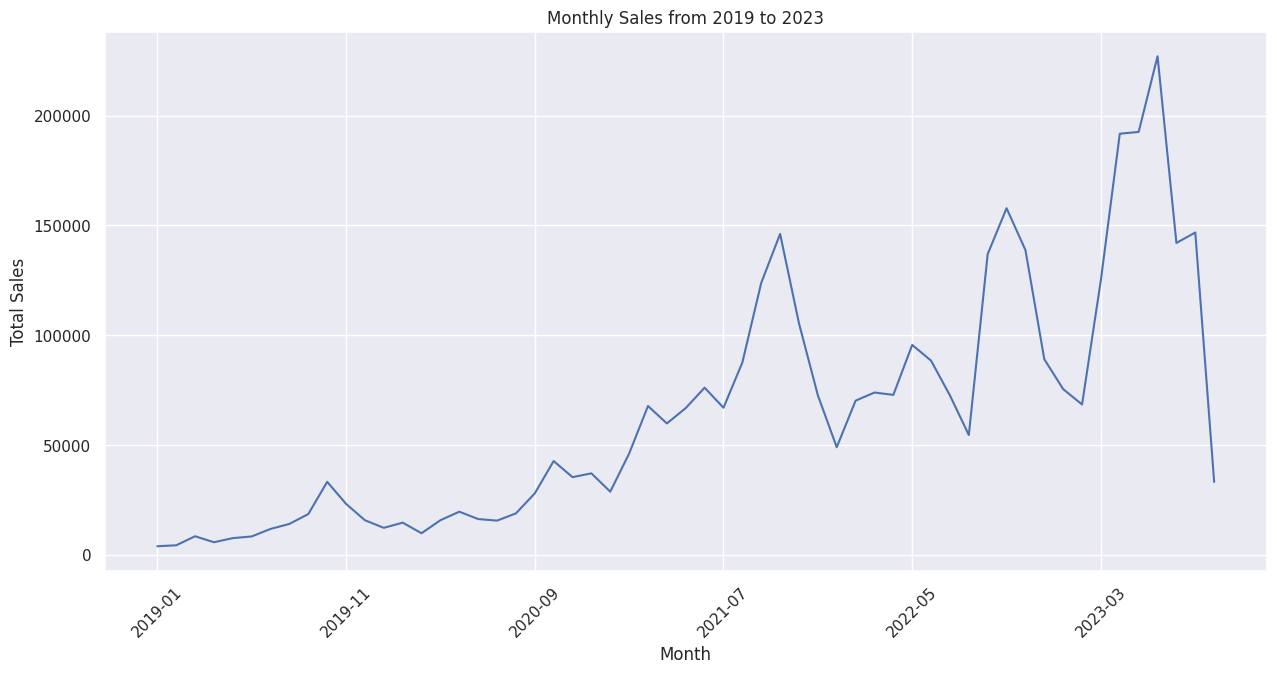

In [145]:
# Extract monthly columns
monthly_columns = df.columns[6:-1]  # Exclude the "total amount" column

# Sum the sales for each month
monthly_sales = df[monthly_columns].sum()

ax = monthly_sales.plot(figsize=(15, 7), grid=True, title="Monthly Sales from 2019 to 2023", ylabel="Total Sales")
ax.set_xlabel("Month")
ax.tick_params(axis='x', rotation=45)

Here we can see trend of sales, the last month (September 2023) has unexpectedly low sales because data comes from beginning of September

## External Factors

When it comes to analyzation of sales data about amount of sales is not enough, because we don't have any variables we can correlate our sales to. 
Let's now focus of Economic factors which are one of the most important factors when it comes to sales.
Because company "XYZ" is based in Poland, our external factors data should be accordingly to Poland.

When it comes to sales of protective gear we can distinguish a couple of most important economic factors which have influence on sales 


### Inflation

One of the main Economic factors is Inflation, especially nowadays Poland and whole Europe experiencing high inflation rates consequently increase of prices and costs of living, let's read monthly inflation data and show it on plot for analyze.

In [146]:
inflation_data = pd.read_csv('../Datasets/Inflation data/Inflation Poland.csv')

print(inflation_data.head())

   2019-01  2019-02  2019-03  2019-04  2019-05  2019-06  2019-07  2019-08  \
0    100.7    101.2    101.7    102.2    102.4    102.6    102.9    102.9   

   2019-09  2019-10  ...  2022-12  2023-01  2023-02  2023-03  2023-04  \
0    102.6    102.5  ...    116.6    116.6    118.4    116.1    114.7   

   2023-05  2023-06  2023-07  2023-08  2023-09  
0      113    111.5    110.8    110.1      NaN  

[1 rows x 57 columns]


In [147]:
df_inflation = pd.DataFrame(inflation_data)
df_inflation

,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,...,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09
0,100.7,101.2,101.7,102.2,102.4,102.6,102.9,102.9,102.6,102.5,...,116.6,116.6,118.4,116.1,114.7,113,111.5,110.8,110.1,NaN


As we can see we only have data till August of this year

Text(0, 0.5, 'Inflation Value')

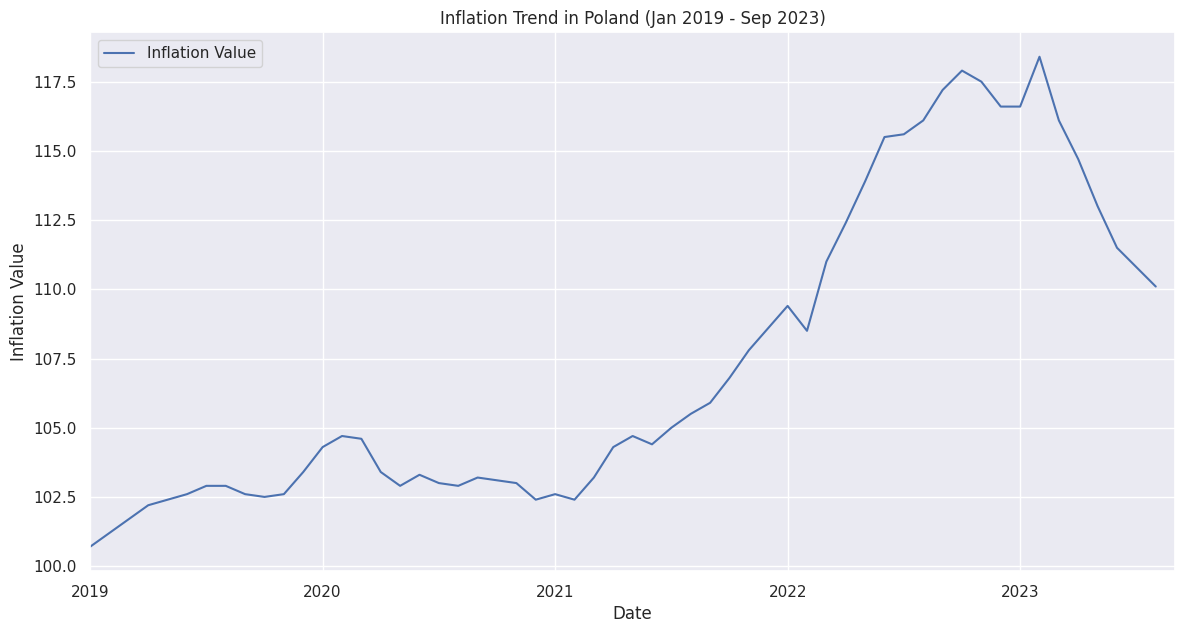

In [148]:
# Reshape the dataframe to long format
df_long = df_inflation.melt(var_name='Date', value_name='Inflation Value')

# Convert the 'Date' column to datetime format for better plotting
df_long['Date'] = pd.to_datetime(df_long['Date'])

# Plot the graph using pandas plotting functionality
ax = df_long.plot(x='Date', y='Inflation Value', figsize=(14, 7), grid=True, title='Inflation Trend in Poland (Jan 2019 - Sep 2023)')
ax.set_xlabel('Date')
ax.set_ylabel('Inflation Value')

As we can see inflation peek was in 2023, also Y axis has values from 100 till about 120, the reason of that its value is calculated based on inflation rate from previous rate 

### Unemployment rate

Unemployment rate is very influential on whole economy of country and on economic growth including new investments and whole service sector consequently sales for individual or companies can be lower with higher unemployment rate.

Let's read data and show it on graph

In [149]:
unemployment_data = pd.read_csv('../Datasets/Unemployment rate/Unemployment rate Poland.csv')

print(unemployment_data.head())

   2019-01  2019-02  2019-03  2019-04  2019-05  2019-06  2019-07  2019-08  \
0      6.1      6.1      5.9      5.6      5.4      5.3      5.2      5.2   

   2019-09  2019-10  ...  2022-12  2023-01  2023-02  2023-03  2023-04  \
0      5.1        5  ...      5.2      5.5      5.5      5.4      5.2   

   2023-05  2023-06  2023-07  2023-08  2023-09  
0      5.1        5        5      NaN      NaN  

[1 rows x 57 columns]


In [150]:
df_unemployment = pd.DataFrame(unemployment_data)
df_unemployment

,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,...,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09
0,6.1,6.1,5.9,5.6,5.4,5.3,5.2,5.2,5.1,5,...,5.2,5.5,5.5,5.4,5.2,5.1,5,5,NaN,NaN


We can see that we only have data till July of this year

Text(0, 0.5, 'Unemployment Value')

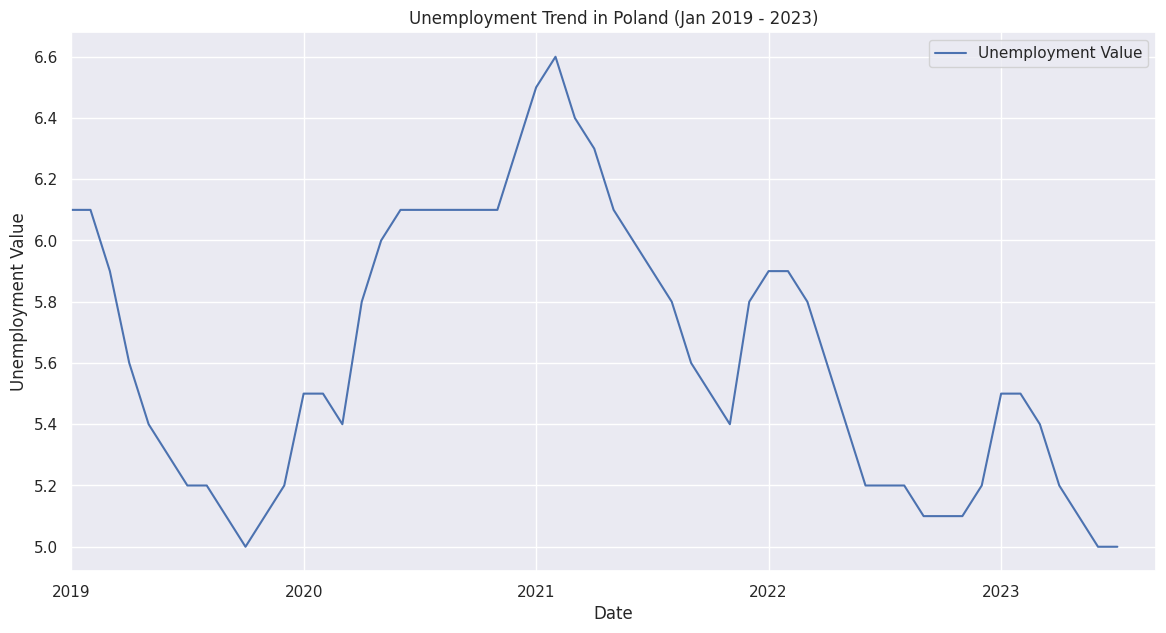

In [151]:
# Reshape the dataframe to long format
data_transposed = df_unemployment.melt(var_name='Date', value_name='Unemployment Value')

# Convert the 'Date' column to datetime format for better plotting
data_transposed['Date'] = pd.to_datetime(df_long['Date'])

# Plot the graph using pandas plotting functionality
ax = data_transposed.plot(x='Date', y='Unemployment Value', figsize=(14, 7), grid=True, title='Unemployment Trend in Poland (Jan 2019 - 2023)')
ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Value')



### Temperature Data

Temperature Data is relevant in this case because some products are seasonal for e.g. outdoors protective gear can have additional thermal isolation, It's not as important as external economic factors but still relevant for our model. 

Let's read the data and show it on the graph


In [152]:
temparteure_data = pd.read_csv('../Datasets/Temperature data/aggregatedDataTemperature.csv', encoding="ISO-8859-1")
print(temparteure_data.head())

   Year  Month  Avg Temp [°C]
0  2019      1      -3.069118
1  2019      2       1.885075
2  2019      3       4.737879
3  2019      4       8.734848
4  2019      5      11.668182


In [153]:
df_temparteure = pd.DataFrame(temparteure_data)
df_temparteure

,Year,Month,Avg Temp [°C]
0,2019,1,-3.069118
1,2019,2,1.885075
2,2019,3,4.737879
3,2019,4,8.734848
4,2019,5,11.668182
5,2019,6,20.843750
6,2019,7,18.079687
7,2019,8,18.996923
8,2019,9,13.167692
9,2019,10,9.652308


<module 'pandas.plotting' from '/home/michal/.local/lib/python3.10/site-packages/pandas/plotting/__init__.py'>

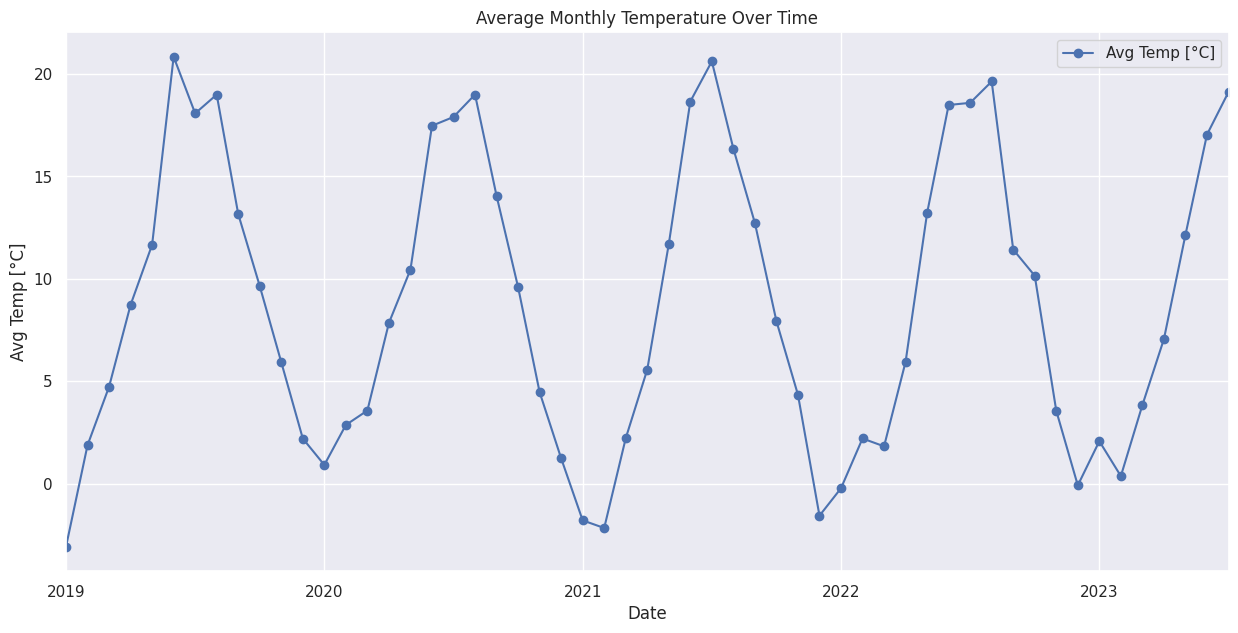

In [154]:
# Create a new column 'Date' combining the Year and Month columns for plotting
df_temparteure['Date'] = pd.to_datetime(df_temparteure[['Year', 'Month']].assign(DAY=1))

# Plotting the data using only pandas' built-in plotting capabilities
df_temparteure.plot(x='Date', y='Avg Temp [°C]', figsize=(15, 7), marker='o', linestyle='-', title='Average Monthly Temperature Over Time', grid=True, xlabel='Date', ylabel='Avg Temp [°C]')

# Display the plot
pd.plotting


We can clearly see natural cycle of the year

### Analyzation 
Lets now draw all data on one graph to see how they are looking with each other and if we can see any pattern, we have to standardize data to draw them on one graph

In [155]:
df = pd.read_csv('../Datasets/Aggregated data/Aggregated.csv')
df

,,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,...,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07
0,Sales,1967.000000,2184.000000,4238.000000,2878.000000,3815.000000,4197.00000,5914.000000,7052.000000,9299.000000,...,78917.000000,69386.000000,44531.000000,37725.000000,34223.000000,62632.000000,95872.000000,96280.00,113509.000000,70998.000000
1,Inflation,100.700000,101.200000,101.700000,102.200000,102.400000,102.60000,102.900000,102.900000,102.600000,...,117.900000,117.500000,116.600000,116.600000,118.400000,116.100000,114.700000,113.00,111.500000,110.800000
2,Unemployment,6.100000,6.100000,5.900000,5.600000,5.400000,5.30000,5.200000,5.200000,5.100000,...,5.100000,5.100000,5.200000,5.500000,5.500000,5.400000,5.200000,5.10,5.000000,5.000000
3,Temperature,-3.069118,1.885075,4.737879,8.734848,11.668182,20.84375,18.079687,18.996923,13.167692,...,10.156364,3.565385,-0.073077,2.082692,0.378846,3.844231,7.065385,12.15,17.042308,19.121569


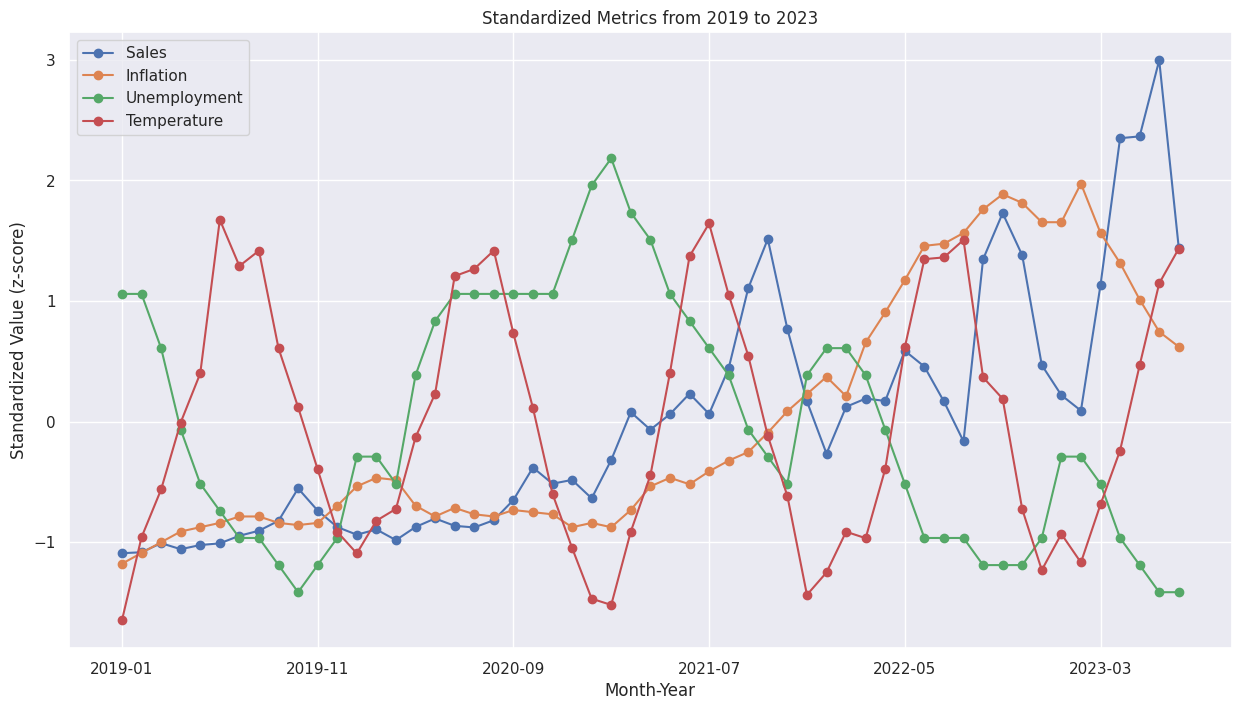

In [156]:
# Transpose the dataframe for easier plotting
df_transposed = df.set_index(df.columns[0]).transpose()

# Standardize the data using pandas methods directly
df_standardized_pandas = df_transposed.apply(lambda x: (x - x.mean()) / x.std())

# Plot the standardized data using pandas plotting
ax = df_standardized_pandas.plot(figsize=(15, 8), marker='o', grid=True)
ax.set_title("Standardized Metrics from 2019 to 2023")
ax.set_xlabel("Month-Year")
ax.set_ylabel("Standardized Value (z-score)")
ax.legend(loc="upper left")


Let's now draw heat map to see the most important features 

Text(0.5, 1.0, 'Correlation Heatmap')

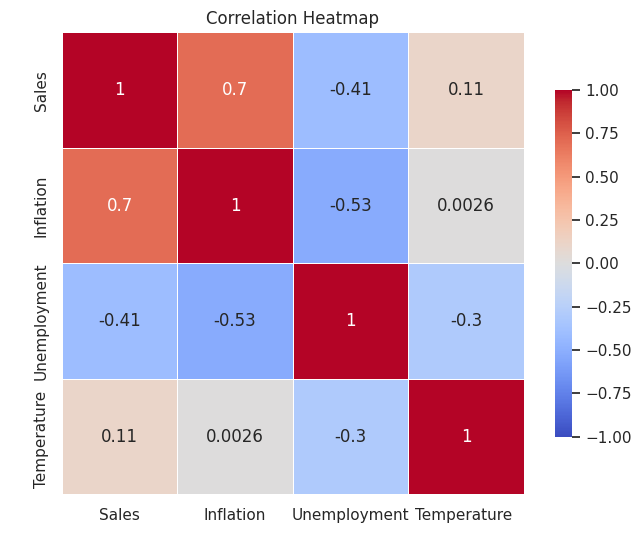

In [157]:
correlation_matrix = df_transposed.corr()
# Visualize the correlation heatmap using seaborn
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": 0.75}).set_title('Correlation Heatmap')
    

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Transpose the data
transposed_data = df.transpose()

# Rename the columns based on the first row
transposed_data.columns = transposed_data.iloc[0]
transposed_data = transposed_data.drop(transposed_data.index[0])

# Reset index
transposed_data.reset_index(inplace=True)
transposed_data.rename(columns={'index': 'Date'}, inplace=True)

transposed_data.head()

  


,Date,Sales,Inflation,Unemployment,Temperature
0,2019-01,1967.0,100.7,6.1,-3.069118
1,2019-02,2184.0,101.2,6.1,1.885075
2,2019-03,4238.0,101.7,5.9,4.737879
3,2019-04,2878.0,102.2,5.6,8.734848
4,2019-05,3815.0,102.4,5.4,11.668182


In [164]:
# Split data into features (X) and target (y) with the added temperature feature
X_updated = transposed_data[["Inflation", "Unemployment", "Temperature "]]
y_updated = transposed_data["Sales"].astype(float)

# Split data into training and test sets (80% training, 20% testing)
X_train_updated, X_test_updated, y_train_updated, y_test_updated = train_test_split(X_updated, y_updated, test_size=0.2, shuffle=False, random_state=42)

# Standardize the updated features
scaler_updated = StandardScaler()
X_train_scaled_updated = scaler_updated.fit_transform(X_train_updated)
X_test_scaled_updated = scaler_updated.transform(X_test_updated)

# Train the SVR model with the updated features
svm_model_updated = SVR(kernel='linear')
svm_model_updated.fit(X_train_scaled_updated, y_train_updated)

# Predict on the test set
y_pred_updated = svm_model_updated.predict(X_test_scaled_updated)

# Evaluate the updated model
mse_updated = mean_squared_error(y_test_updated, y_pred_updated)
r2_updated = r2_score(y_test_updated, y_pred_updated)

mse_updated, r2_updated


(3387334460.0289717, -4.858339506451047)